In [13]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
!pwd

/webapps/piglegsurgery/piglegcv


In [15]:
import torch
torch.cuda.is_available()

True

In [1]:
!nvidia-smi

Fri Sep  1 13:51:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
|  0%   43C    P8    10W / 250W |    205MiB / 11175MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
torch.__version__

'1.12.0a0+8a1a93a'

In [18]:
Path("/root/.cache/torch/hub/checkpoints/").exists()

False

In [19]:
!ls /root/.cache/torch/hub/checkpoints/

ls: cannot access '/root/.cache/torch/hub/checkpoints/': No such file or directory


# Run incision crop

In [23]:
# find the video
i = -5
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*knopf*.mp4"))
print(len(img_pths))
img_pths[i]

76


PosixPath('../piglegsurgeryweb/media/upload/20230222-130058_Einzelknopfnaht_075e5ae66dbce61ad576a8c90d2623b76e2ea990/Einzelknopfnaht.mp4')

3415
Last frame capture error, frame 3415
Last frame capture error, frame 3414
Last frame capture error, frame 3413
Last frame capture error, frame 3412
Last frame capture error, frame 3411


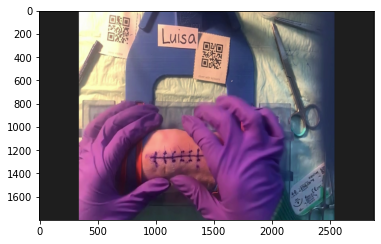

In [24]:
# get the frame
img = pigleg_cv.get_frame_to_process(img_pths[i])
# opencv has inverted color channels
plt.imshow(img[:,:,::-1])


2023-09-01 11:50:58,414 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-09-01 11:50:58,423 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(1800, 2880, 3), max(img)=255


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-09-01 11:50:59,720 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-09-01 11:50:59.723 | DEBUG    | tools:save_json:9 - Writing 'delete/meta.json'
2023-09-01 11:50:59.723 | DEBUG    | tools:save_json:18 - old keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-09-01 11:50:59.724 | DEBUG    | tools:save_json:20 - updated keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']


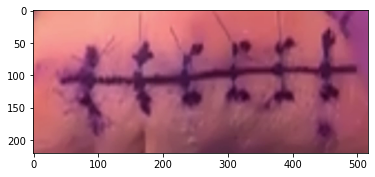

In [25]:
# find the incision
imgs, bboxes = pigleg_cv.run_incision_detection(img, "./delete/")
plt.imshow(imgs[0][:,:,::-1])

In [26]:
# pip install mmcv-full

# Run whole image processing

2023-09-01 11:52:07.426 | DEBUG    | pigleg_cv:run_image_processing:139 - Running image processing...
2023-09-01 11:52:07.603 | DEBUG    | run_qr:read_qr_from_frame:28 - qr code text = 'QR scale pigleg'
2023-09-01 11:52:07.605 | DEBUG    | run_perpendicular:main_perpendicular:267 - main_perpendicular...
2023-09-01 11:52:07.612 | DEBUG    | run_perpendicular:main_perpendicular:275 - incision detection ...
2023-09-01 11:52:07,612 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-09-01 11:52:07,614 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(776, 776, 3), max(img)=255


390
../piglegsurgeryweb/media/upload/20211104-131923_2021.11.3-B-Volkers-Einzelknopfnaht Schweinefuß_c845cd8ce872c5f3ef48b5baf30f3abc0198578d/preview.jpg
Fusing layers... 
IDetect.fuse
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-09-01 11:52:08,283 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-09-01 11:52:08.284 | DEBUG    | tools:save_json:9 - Writing 'del_test_image_output/meta.json'
2023-09-01 11:52:08.285 | DEBUG    | tools:save_json:18 - old keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-09-01 11:52:08.285 | DEBUG    | tools:save_json:20 - updated keys: ['pixelsize_m_by_incision_size', 'incision_bboxes']
2023-09-01 11:52:08.286 | DEBUG    | run_perpendicular:main_perpendicular:277 - len(imgs)=1
2023-09-01 11:52:08.309 | DEBUG    | tools:save_json:9 - Writing './del_test_image_output/perpendicular.json'
2023-09-01 11:52:08.310 | DEBUG    | tools:save_json:18 - old keys: ['intersections', 'alphas']
2023-09-01 11:52:08.311 | DEBUG    | tools:save_json:20 - updated keys: ['intersections', 'alphas']
2023-09-01 11:52:08.797 | DEBUG    | pigleg_cv:run_image_processing:143 - Perpendicular finished.


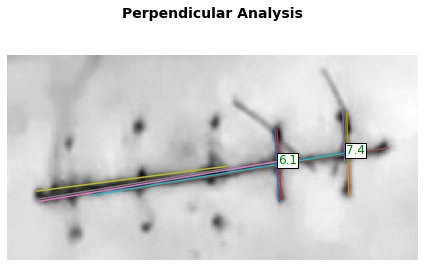

In [28]:
# find the video
i = 41
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/*.jpg"))
print(len(img_pths))
print(img_pths[i])
pigleg_cv.run_image_processing(str(img_pths[i]),  "./del_test_image_output/")

# Run whole video processing

In [29]:
img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob("*/test*.mp4"))
img_pths[0]

PosixPath('../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4')

2023-09-01 00:31:32.382 | DEBUG    | pigleg_cv:do_computer_vision:41 - CV processing started on ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-09-01 00:31:32.384 | DEBUG    | pigleg_cv:run_video_processing2:98 - Running video processing...
2023-09-01 00:31:32.384 | DEBUG    | run_qr:main_qr:66 - looking for qr code...
2023-09-01 00:31:32.544 | DEBUG    | run_qr:main_qr:95 - frame=0
2023-09-01 00:31:32.578 | DEBUG    | run_qr:main_qr:95 - frame=10
2023-09-01 00:31:32.610 | DEBUG    | run_qr:main_qr:95 - frame=20
2023-09-01 00:31:32.641 | DEBUG    | run_qr:main_qr:95 - frame=30
2023-09-01 00:31:32.673 | DEBUG    | run_qr:main_qr:95 - frame=40
2023-09-01 00:31:32.705 | DEBUG    | run_qr:main_qr:95 - frame=50


Fusing layers... 
IDetect.fuse


2023-09-01 00:31:32.734 | DEBUG    | run_qr:main_qr:95 - frame=60
2023-09-01 00:31:32.764 | DEBUG    | run_qr:main_qr:95 - frame=70
2023-09-01 00:31:32.793 | DEBUG    | run_qr:main_qr:95 - frame=80
2023-09-01 00:31:32.823 | DEBUG    | run_qr:main_qr:95 - frame=90
2023-09-01 00:31:32.852 | DEBUG    | run_qr:main_qr:95 - frame=100
2023-09-01 00:31:32.881 | DEBUG    | run_qr:main_qr:95 - frame=110
2023-09-01 00:31:32.909 | DEBUG    | run_qr:main_qr:95 - frame=120
2023-09-01 00:31:32.937 | DEBUG    | run_qr:main_qr:95 - frame=130
2023-09-01 00:31:32.965 | DEBUG    | run_qr:main_qr:95 - frame=140
2023-09-01 00:31:32.993 | DEBUG    | run_qr:main_qr:95 - frame=150
2023-09-01 00:31:33.021 | DEBUG    | run_qr:main_qr:95 - frame=160
2023-09-01 00:31:33.049 | DEBUG    | run_qr:main_qr:95 - frame=170
2023-09-01 00:31:33.076 | DEBUG    | run_qr:main_qr:95 - frame=180
2023-09-01 00:31:33.103 | DEBUG    | run_qr:main_qr:118 - prepared to save to file del_test_video_output/meta.json
2023-09-01 00:31:3

prepared to save to file del_test_video_output/meta.json
185
Fusing layers... 
IDetect.fuse


2023-09-01 00:31:33.324 | DEBUG    | run_perpendicular:main_perpendicular:267 - main_perpendicular...
2023-09-01 00:31:33.391 | DEBUG    | run_perpendicular:main_perpendicular:275 - incision detection ...
2023-09-01 00:31:33,392 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - checkpoint_path.exists=True
2023-09-01 00:31:33,394 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - img.shape=(540, 960, 3), max(img)=255


185
load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2023-09-01 00:31:34,006 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - DEBUG - number of detected incisions = 1
2023-09-01 00:31:34.007 | DEBUG    | tools:save_json:9 - Writing 'del_test_video_output/meta.json'
2023-09-01 00:31:34.008 | DEBUG    | tools:save_json:18 - old keys: ['qr_data', 'pixelsize_m_by_incision_size', 'incision_bboxes']
2023-09-01 00:31:34.009 | DEBUG    | tools:save_json:20 - updated keys: ['qr_data', 'pixelsize_m_by_incision_size', 'incision_bboxes']
2023-09-01 00:31:34.011 | DEBUG    | run_perpendicular:main_perpendicular:277 - len(imgs)=1
2023-09-01 00:31:34.043 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output/perpendicular.json'
2023-09-01 00:31:34.045 | DEBUG    | tools:save_json:18 - old keys: ['intersections', 'alphas']
2023-09-01 00:31:34.046 | DEBUG    | tools:save_json:20 - updated keys: ['intersections', 'alphas']
2023-09-01 00:31:34.220 | DEBUG    | pigleg_cv:run_image_processing:143 - Perpendicular finished.
2023-09-01

device=cuda


2023-09-01 00:31:35,414 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-09-01 00:31:35,443 - /webapps/piglegsurgery/piglegcv/incision_detection_mmdet.py - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2023-09-01 00:31:35,444 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-09-01 00:31:35,445 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2023-09-01 00:31:35,695 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, t

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2023-09-01 00:32:00.418 | DEBUG    | pigleg_cv:run_video_processing2:118 - Tracker finished in 26.197144985198975s.
2023-09-01 00:32:00.419 | DEBUG    | pigleg_cv:run_video_processing2:125 - filename=../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4, outputdir=./del_test_video_output/
2023-09-01 00:32:00.419 | DEBUG    | pigleg_cv:run_video_processing2:126 - filename=True, outputdir=True
2023-09-01 00:32:00.426 | DEBUG    | run_report:main_report:613 - size_input_video: [960, 540], size_output_video: [1301, 420], size_output_img: [746, 420], resize_factor: 0.7777777777777778
2023-09-01 00:32:00.428 | DEBUG    | run_report:main_report:632 - Sort data N=
/webapps/piglegsurgery/piglegcv/run_report.py:666: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you mus

7080.815803910117
b Needle holder
g Scissors


2023-09-01 00:32:01.502 | DEBUG    | run_report:main_report:696 - Frame 10 processed!
2023-09-01 00:32:02.431 | DEBUG    | run_report:main_report:696 - Frame 20 processed!
2023-09-01 00:32:03.354 | DEBUG    | run_report:main_report:696 - Frame 30 processed!
2023-09-01 00:32:04.294 | DEBUG    | run_report:main_report:696 - Frame 40 processed!
2023-09-01 00:32:05.239 | DEBUG    | run_report:main_report:696 - Frame 50 processed!
2023-09-01 00:32:06.165 | DEBUG    | run_report:main_report:696 - Frame 60 processed!
2023-09-01 00:32:07.093 | DEBUG    | run_report:main_report:696 - Frame 70 processed!
2023-09-01 00:32:08.031 | DEBUG    | run_report:main_report:696 - Frame 80 processed!
2023-09-01 00:32:08.963 | DEBUG    | run_report:main_report:696 - Frame 90 processed!
2023-09-01 00:32:09.892 | DEBUG    | run_report:main_report:696 - Frame 100 processed!
2023-09-01 00:32:10.819 | DEBUG    | run_report:main_report:696 - Frame 110 processed!
2023-09-01 00:32:11.759 | DEBUG    | run_report:main

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


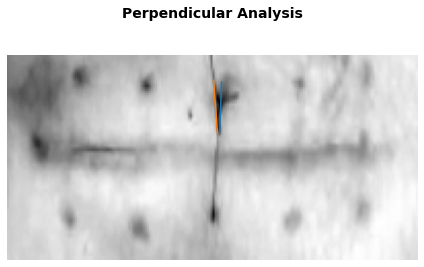

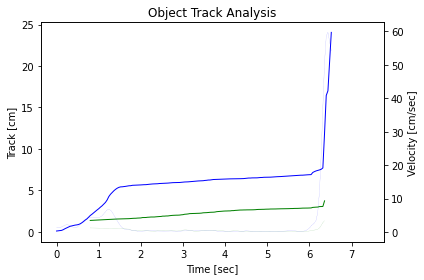

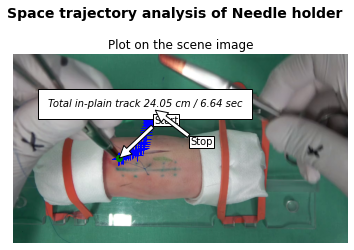

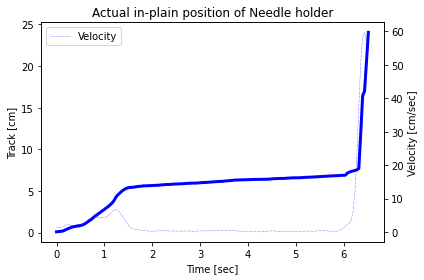

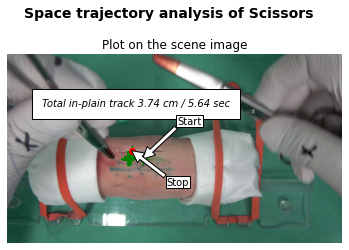

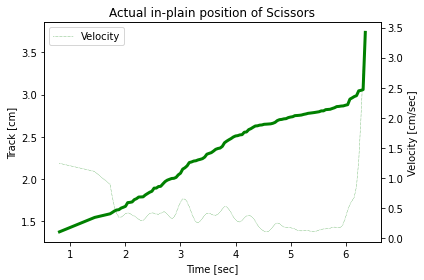

In [285]:
pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)

## Run just `main_report()`

You can repeat to do the main report afer the `do_computer_vision()` is done firsttime

2023-09-01 00:32:20.970 | DEBUG    | run_report:main_report:613 - size_input_video: [960, 540], size_output_video: [1301, 420], size_output_img: [746, 420], resize_factor: 0.7777777777777778
2023-09-01 00:32:20.973 | DEBUG    | run_report:main_report:632 - Sort data N=
/webapps/piglegsurgery/piglegcv/run_report.py:666: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(type(data_pixels_list[0]))
2023-09-01 00:32:20.980 | DEBUG    | tools:save_json:9 - Writing './del_test_video_output//tracks_points.json'
2023-09-01 00:32:20.981 | DEBUG    | tools:save_json:20 - updated keys: ['frame_ids', 'data_pixels_0', 'data_pixels_1', 'data_pixels_2', 'data_pixels_3']
2023-09-01 00:32:21.041 | DEBUG    | run_report:create_video_report:484 - main_video_report: OK
2023-09-01 00:32:

7080.815803910117
b Needle holder
g Scissors


2023-09-01 00:32:22.052 | DEBUG    | run_report:main_report:696 - Frame 10 processed!
2023-09-01 00:32:23.009 | DEBUG    | run_report:main_report:696 - Frame 20 processed!
2023-09-01 00:32:23.963 | DEBUG    | run_report:main_report:696 - Frame 30 processed!
2023-09-01 00:32:24.923 | DEBUG    | run_report:main_report:696 - Frame 40 processed!
2023-09-01 00:32:25.887 | DEBUG    | run_report:main_report:696 - Frame 50 processed!
2023-09-01 00:32:26.843 | DEBUG    | run_report:main_report:696 - Frame 60 processed!
2023-09-01 00:32:27.808 | DEBUG    | run_report:main_report:696 - Frame 70 processed!
2023-09-01 00:32:28.760 | DEBUG    | run_report:main_report:696 - Frame 80 processed!
2023-09-01 00:32:29.725 | DEBUG    | run_report:main_report:696 - Frame 90 processed!
2023-09-01 00:32:30.680 | DEBUG    | run_report:main_report:696 - Frame 100 processed!
2023-09-01 00:32:31.638 | DEBUG    | run_report:main_report:696 - Frame 110 processed!
2023-09-01 00:32:32.598 | DEBUG    | run_report:main

main_report: Video file ../piglegsurgeryweb/media/upload/20221009-162416_test_video_end_f84edcc4ca3c01ea693603cd120ac74bc69b93d8/test_video_end.mp4 is processed!


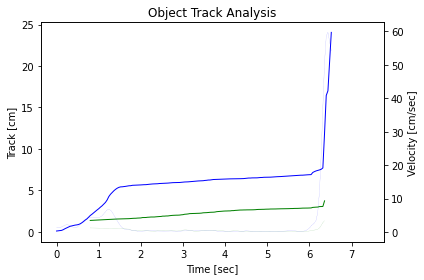

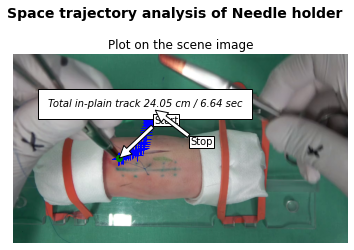

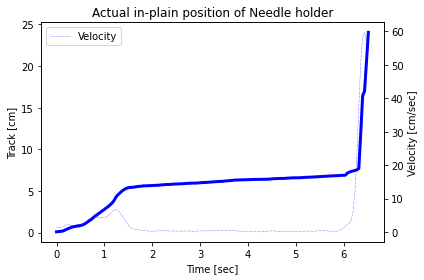

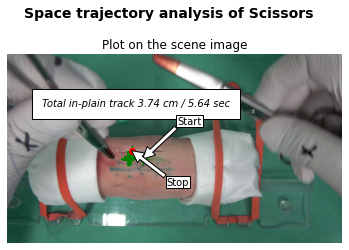

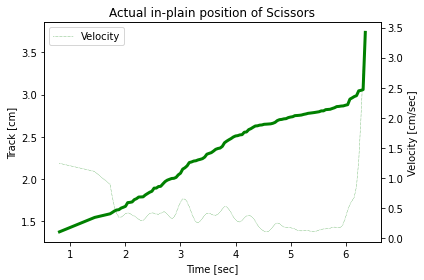

In [286]:

# pigleg_cv.do_computer_vision(img_pths[0],  "./del_test_video_output/", meta=None)
pigleg_cv.main_report(str(img_pths[0]),  "./del_test_video_output/")

In [ ]:
img_pths[0]

In [ ]:
!python /home/appuser/mmdetection/mmdet/utils/collect_env.py

In [ ]:
!pwd

In [ ]:
pip list

In [35]:
# !MMCV_WITH_OPS=1 FORCE_CUDA=1 pip install mmcv-full==1.5.2

In [36]:
# !pip uninstall -y mmcv-full